# **File Mounting**

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
data = "/content/drive/MyDrive/Colab Notebooks/AI_Lab_Project/Dataset/Dataset.txt"#DATASET
attack ="/content/drive/My Drive/Colab Notebooks/AI_Lab_Project/Dataset/Attack_types.txt" # Attack Dataset

# **Importing all the libraries**

In [146]:
import pandas as pd
import numpy as np

# sklearn: importing necessary libraries for machine learning tasks
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

# scipy: importing zscore for standardizing data
from scipy.stats import zscore

# matplotlib and seaborn: importing libraries for data visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

# itertools: importing for iterator functions
import itertools

# **Exploring Dataset**

# **File: 01 - Preprocessing**

In [147]:
df = pd.read_csv(data)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [148]:
df['attack_category'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack_category, dtype: int64

In [149]:
df['protocol_type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [150]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [151]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
125968    False
125969    False
125970    False
125971    False
125972    False
Length: 125973, dtype: bool

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [153]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [154]:
df.describe(include='object')

,protocol_type,service,flag,attack_category
count,125973,125973,125973,125973
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102689,40338,74945,67343


<Axes: xlabel='protocol_type', ylabel='count'>

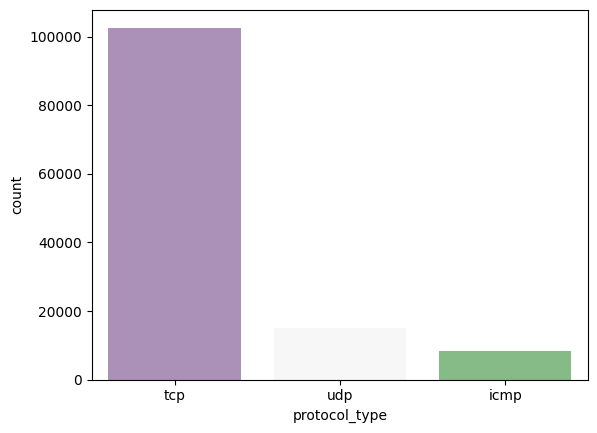

In [155]:
sns.countplot(data=df,x='protocol_type',palette='PRGn')

<Axes: xlabel='protocol_type', ylabel='count'>

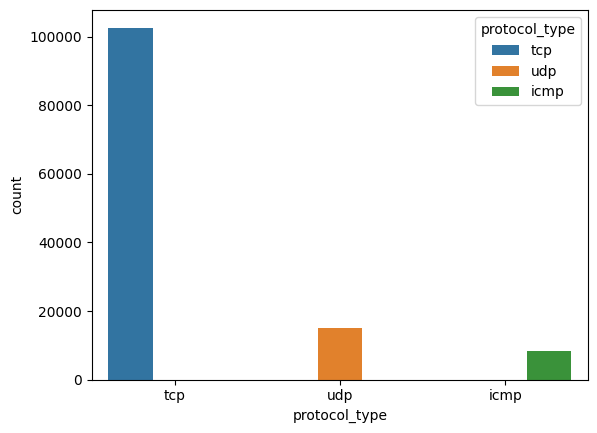

In [156]:
sns.countplot(data=df, x="protocol_type", hue="protocol_type")

# **Data Cleaning: z-score, handling outliers, scaler**

In [157]:
df = pd.read_csv(data)

# Checking the number of missing values in each column
print(df.isnull().sum())

# Cleaning the Data

# Handling missing values
df.fillna(0, inplace=True)

# Selecting the columns for calculating z-scores (excluding any non-numeric or categorical columns)
columns_for_zscore = ['duration', 'src_bytes', 'dst_bytes']

# Converting the selected columns to numeric type if needed
df[columns_for_zscore] = df[columns_for_zscore].apply(pd.to_numeric, errors='coerce')

# Calculating z-scores for each column
z_scores = zscore(df[columns_for_zscore])

# Defining a threshold for outliers (e.g., z-score > 3 or < -3)
outlier_threshold = 3

# Finding the indices of outliers in each column
outliers = np.where(np.abs(z_scores) > outlier_threshold)

# Remove outliers from the dataset
df = df.drop(outliers[0])

# Select the columns to be scaled (excluding any categorical or binary columns)
columns_to_scale = ['duration', 'src_bytes', 'dst_bytes']

# Performing data preprocessing

# Converting the selected columns to numeric type
df[columns_to_scale] = df[columns_to_scale].apply(pd.to_numeric, errors='coerce')

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [158]:
df.shape

(124536, 43)

# **File: 02 - Reading**

In [159]:
df2 = pd.read_csv(attack)
df2.head()

,attack_category attack_type
0,apache2 dos
1,back dos
2,mailbomb dos
3,processtable dos
4,snmpgetattack dos


In [160]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   attack_category attack_type  41 non-null     object
dtypes: object(1)
memory usage: 456.0+ bytes


In [187]:
def change_label(file):
    file.attack_category.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
    file.attack_category.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
    file.attack_category.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
    file.attack_category.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [188]:
change_label(df)

In [189]:
df.attack_category.value_counts()

4    66815
0    45927
1    10769
2      973
3       52
Name: attack_category, dtype: int64

# **Grouping attack_category into 5 classes**

In [190]:
# Creating a LabelEncoder object to encode categorical variables
encoder = preprocessing.LabelEncoder()

# Encoding the 'attack_category' column
df['attack_category'] = encoder.fit_transform(df['attack_category'])

# Encoding the 'protocol_type' column
df['protocol_type'] = encoder.fit_transform(df['protocol_type'])

# Encoding the 'service' column
df['service'] = encoder.fit_transform(df['service'])

# Encoding the 'flag' column
df['flag'] = encoder.fit_transform(df['flag'])

# Printing the unique values in the 'attack_category' column
print(df['attack_category'].unique())


[4 0 2 1 3]


# **Correlation Analysis**

In [191]:
# Computing the correlation matrix for the DataFrame
correlations = df.corr()

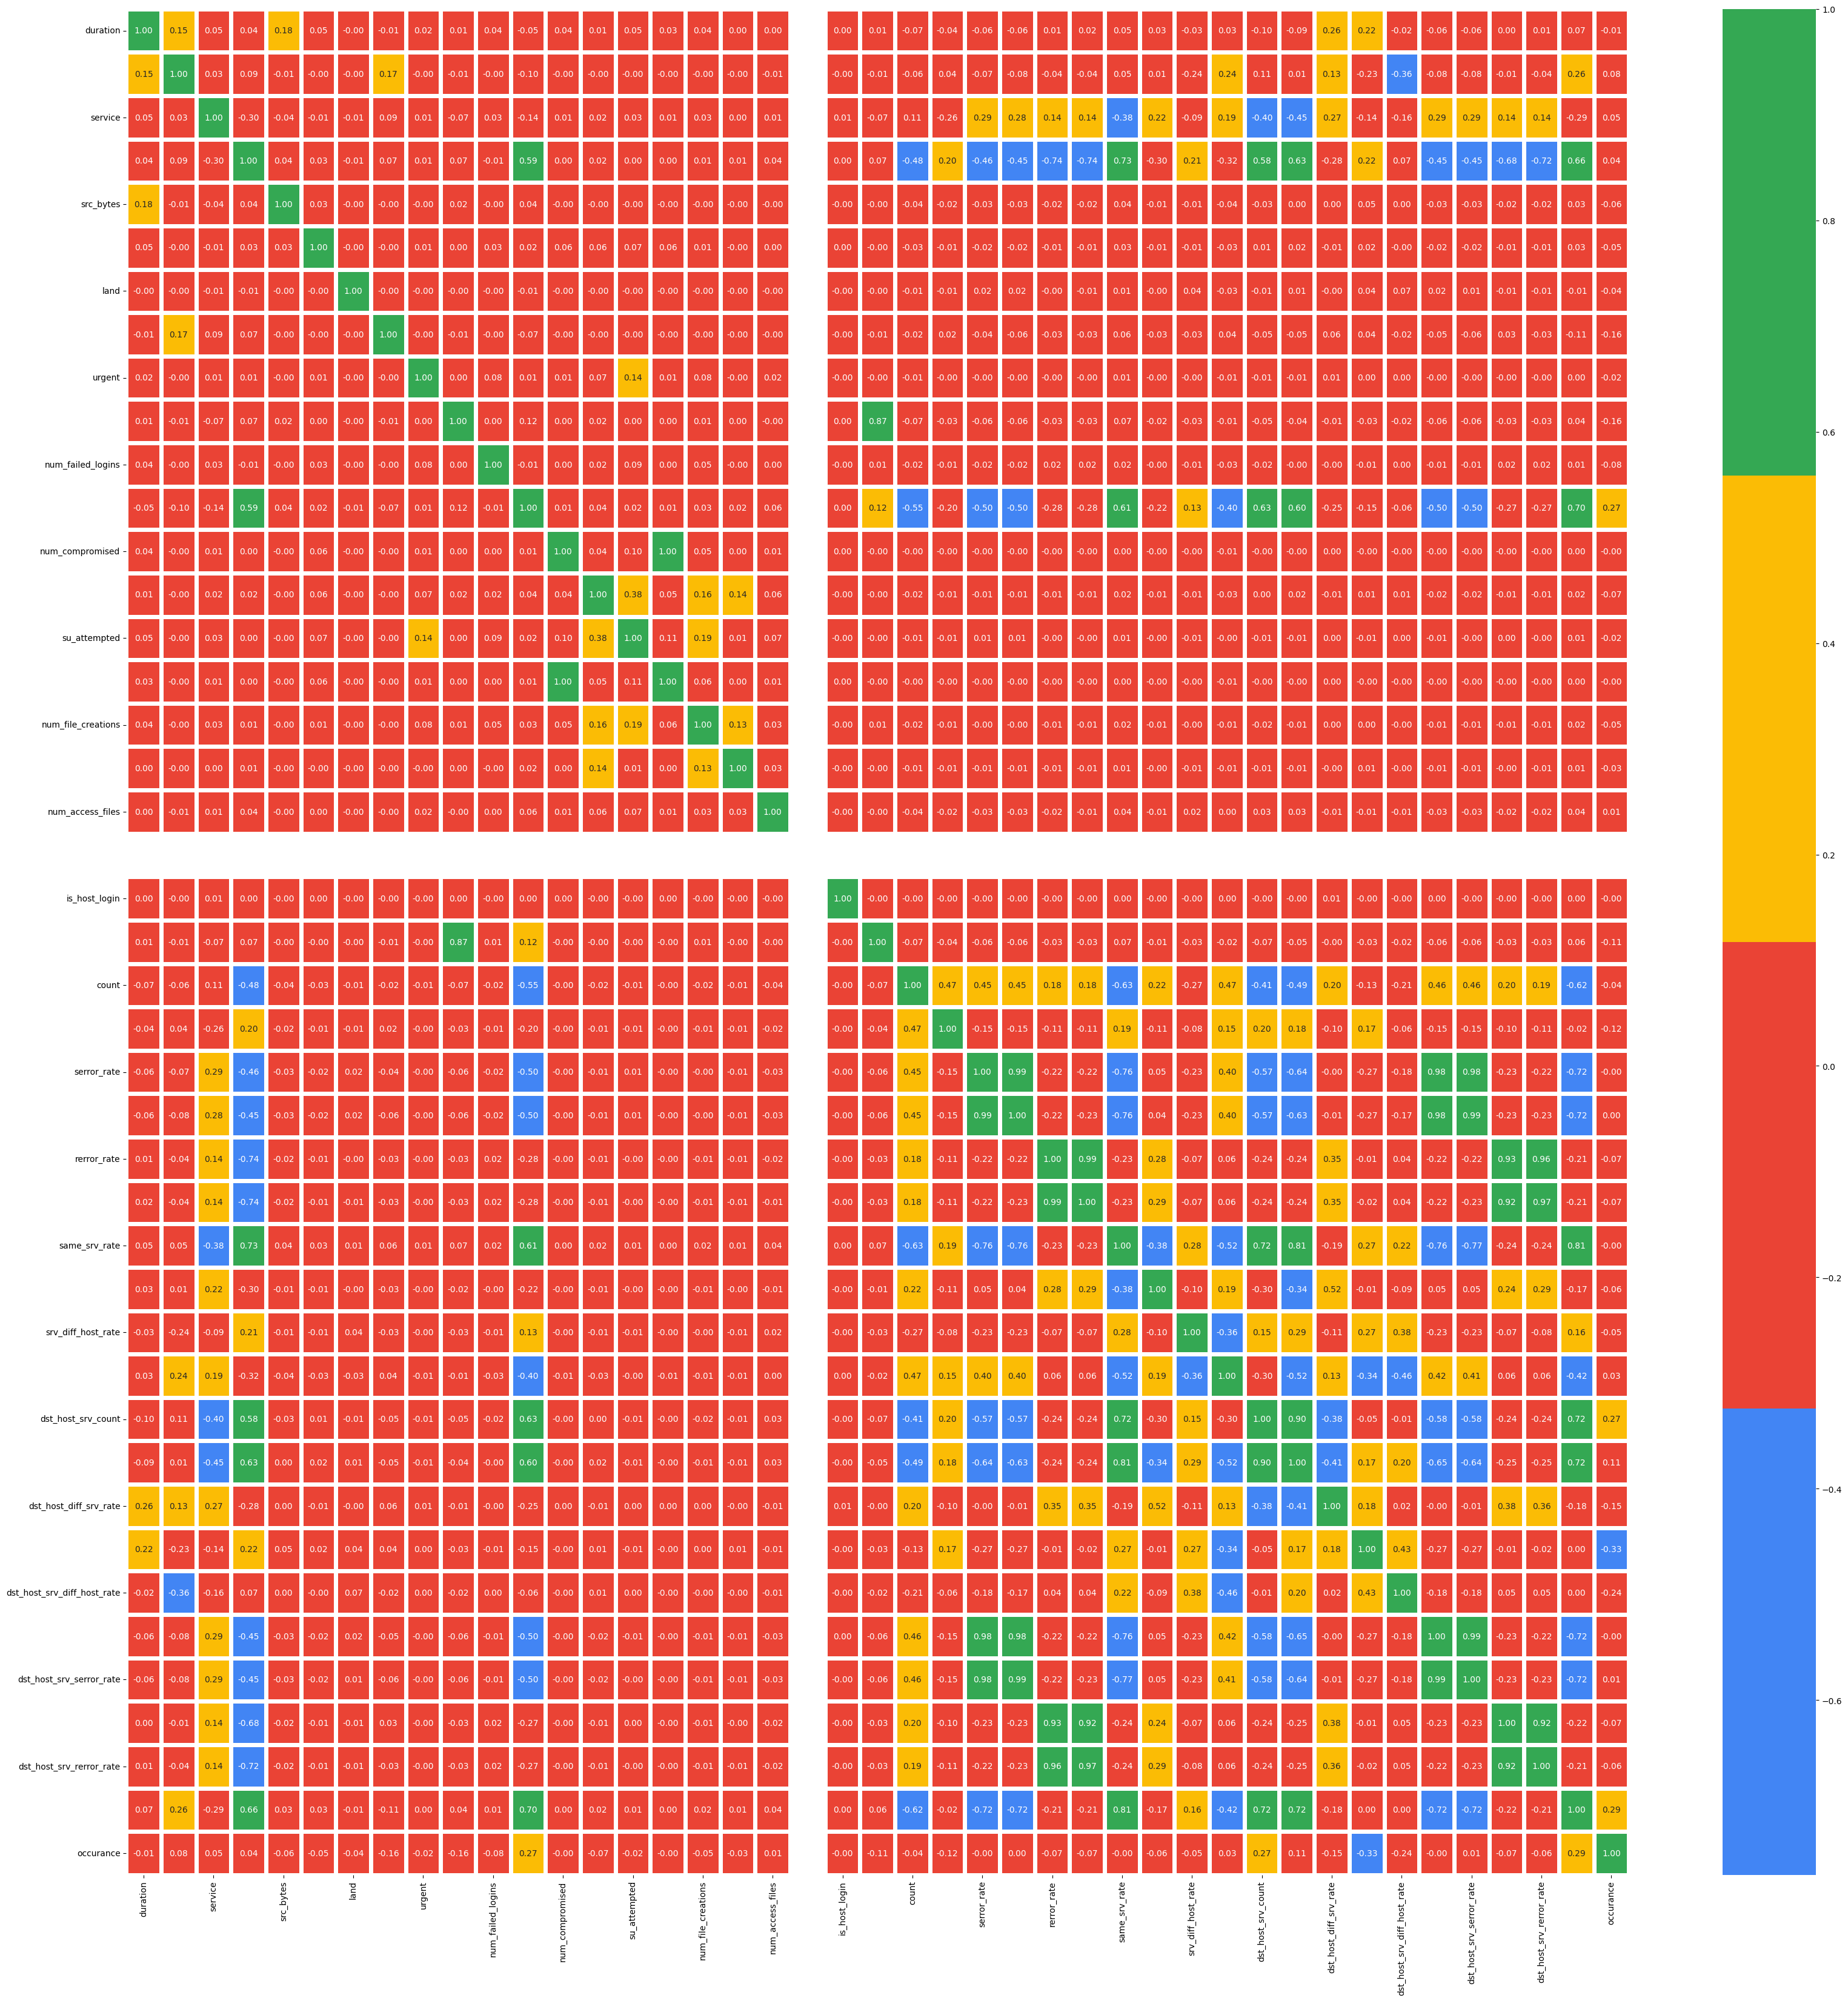

In [192]:
# Specifying a color sequence based on Google's colors
color_sequence = ["#4285F4", "#EA4335", "#FBBC05", "#34A853"]

# Generating a custom color map using the specified colors
custom_color_map = ListedColormap(color_sequence)

# Constructing the heatmap with the custom color map and display settings
heatmap_plot = sns.heatmap(correlations, cmap=custom_color_map, cbar=True, linewidths=5, annot=True, fmt=".2f")

# Adjusting the dimensions of the heatmap figure
heatmap_plot.figure.set_size_inches(40, 40)

# Rendering the heatmap
plt.show()


In [193]:
# Identifying the top 20 features with the highest correlation to 'attack_category'
top_features = correlations.nlargest(20, 'attack_category')['attack_category'].index

# Printing the top features
print(top_features)

# Creating a DataFrame with only the top correlated features
selected_features_data = df[top_features]

Index(['attack_category', 'same_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'logged_in', 'flag', 'occurance',
       'protocol_type', 'srv_diff_host_rate', 'duration', 'is_guest_login',
       'num_access_files', 'hot', 'src_bytes', 'dst_bytes', 'root_shell',
       'num_file_creations', 'num_shells', 'su_attempted',
       'num_failed_logins'],
      dtype='object')


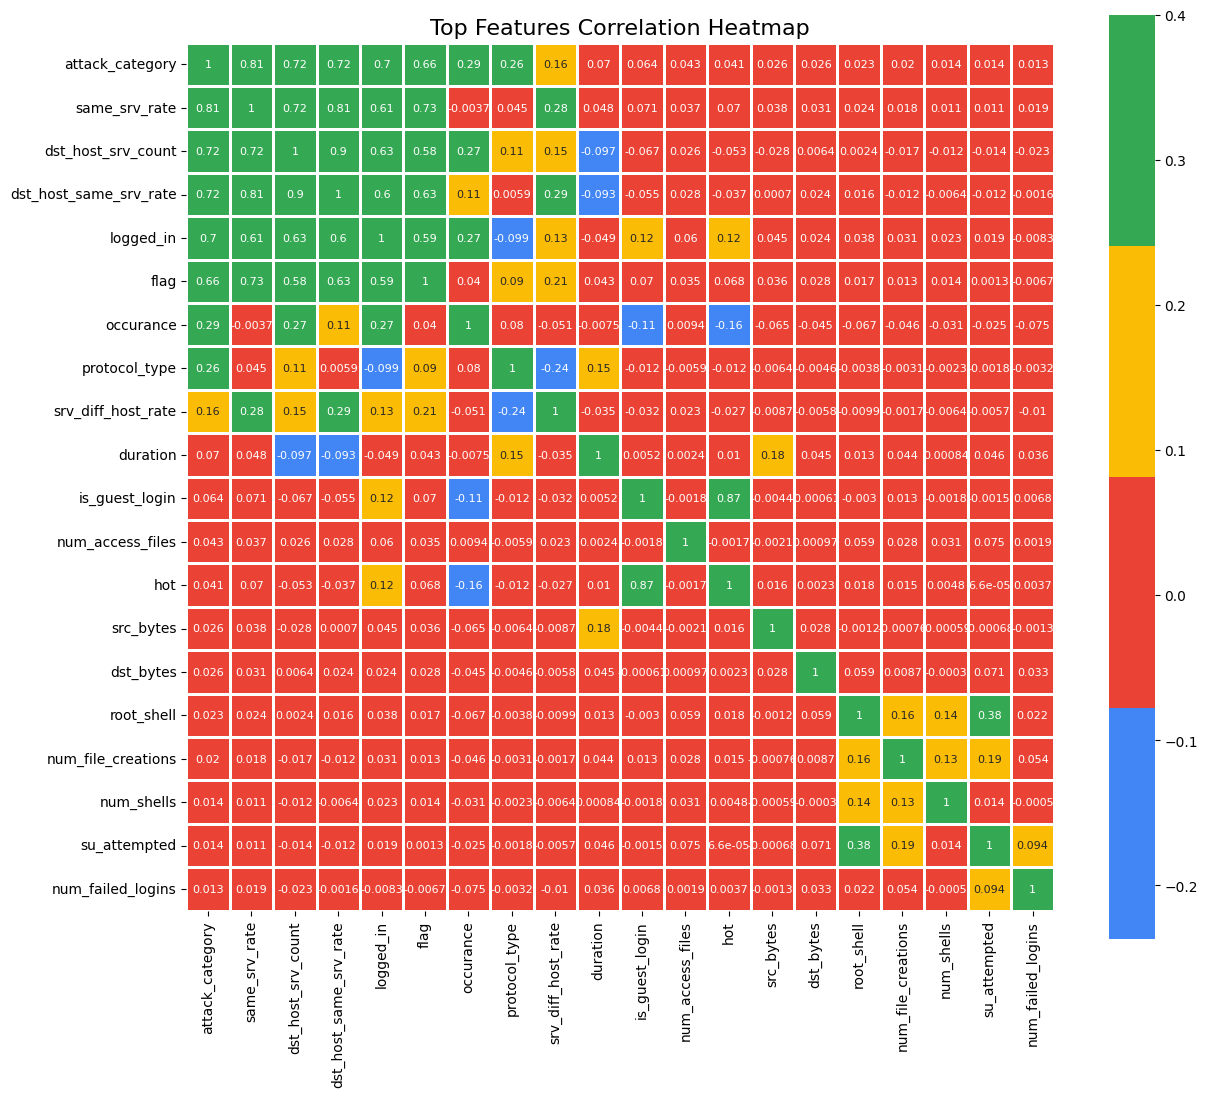

In [194]:
# Calculating the correlation matrix for the top_features in the DataFrame
correlation_matrix = np.corrcoef(selected_features_data.values.T)

# Creating a figure and axis with custom dimensions
fig, axis = plt.subplots(figsize=(14, 12))

# Creating a heatmap with modified display settings and the custom colormap
heatmap = sns.heatmap(correlation_matrix, vmax=0.4, linewidths=0.8, square=True, annot=True, cmap=custom_color_map,
                      linecolor='white', xticklabels=top_features.values, annot_kws={'size': 8}, yticklabels=top_features.values)

# Customizing the plot elements
axis.set_title("Top Features Correlation Heatmap", fontsize=16)
axis.tick_params(axis="x")
axis.tick_params(axis="y")

# Displaying the heatmap
plt.show()


In [195]:
selected_features_data.head()

,attack_category,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,flag,occurance,protocol_type,srv_diff_host_rate,duration,is_guest_login,num_access_files,hot,src_bytes,dst_bytes,root_shell,num_file_creations,num_shells,su_attempted,num_failed_logins
0,4,1.00,25,0.17,0,9,20,1,0.00,-0.09959,0,0,0,-0.048160,-0.040594,0,0,0,0,0
1,4,0.08,1,0.00,0,9,15,2,0.00,-0.09959,0,0,0,-0.050210,-0.040594,0,0,0,0,0
2,0,0.05,26,0.10,0,5,19,1,0.00,-0.09959,0,0,0,-0.051077,-0.040594,0,0,0,0,0
3,4,1.00,255,1.00,1,9,21,1,0.00,-0.09959,0,0,0,-0.049699,0.073614,0,0,0,0,0
4,4,1.00,255,1.00,1,9,21,1,0.09,-0.09959,0,0,0,-0.049895,-0.034710,0,0,0,0,0


In [170]:
# Separating the features and target variable for training
X_train = selected_features_data.drop(['attack_category'], axis=1)
Y_train = selected_features_data['attack_category']

In [171]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124536 entries, 0 to 125972
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   same_srv_rate           124536 non-null  float64
 1   dst_host_srv_count      124536 non-null  int64  
 2   dst_host_same_srv_rate  124536 non-null  float64
 3   logged_in               124536 non-null  int64  
 4   flag                    124536 non-null  int64  
 5   occurance               124536 non-null  int64  
 6   protocol_type           124536 non-null  int64  
 7   srv_diff_host_rate      124536 non-null  float64
 8   duration                124536 non-null  float64
 9   is_guest_login          124536 non-null  int64  
 10  num_access_files        124536 non-null  int64  
 11  hot                     124536 non-null  int64  
 12  src_bytes               124536 non-null  float64
 13  dst_bytes               124536 non-null  float64
 14  root_shell          

In [172]:
# List the selected feature names
selected_feature_list = [
    'same_srv_rate',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'logged_in',
    'flag',
    'occurance',
    'protocol_type',
    'srv_diff_host_rate',
    'is_guest_login',
    'hot',
    'root_shell',
    'num_failed_logins',
    'num_root',
    'num_compromised',
    'dst_host_srv_diff_host_rate'
]

In [173]:
# Finding the intersection of the selected_feature_list and the actual columns in the X_train DataFrame
existing_features = list(set(selected_feature_list).intersection(set(X_train.columns)))

# Keeping only the existing features in the X_train DataFrame
X_train = X_train[existing_features]

# Displaying the column names of the updated X_train DataFrame
print(X_train.columns)

Index(['is_guest_login', 'protocol_type', 'srv_diff_host_rate', 'occurance',
       'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'flag',
       'root_shell', 'logged_in', 'num_failed_logins', 'hot'],
      dtype='object')


In [174]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124536 entries, 0 to 125972
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   is_guest_login          124536 non-null  int64  
 1   protocol_type           124536 non-null  int64  
 2   srv_diff_host_rate      124536 non-null  float64
 3   occurance               124536 non-null  int64  
 4   same_srv_rate           124536 non-null  float64
 5   dst_host_srv_count      124536 non-null  int64  
 6   dst_host_same_srv_rate  124536 non-null  float64
 7   flag                    124536 non-null  int64  
 8   root_shell              124536 non-null  int64  
 9   logged_in               124536 non-null  int64  
 10  num_failed_logins       124536 non-null  int64  
 11  hot                     124536 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 12.4 MB


# **Splitting the X, Y | Train, Test**

In [175]:
scaler = StandardScaler()

# Fitting and transforming the X_train data and storing it in a new variable
X_train_transformed = scaler.fit_transform(X_train)

# Converting the transformed data back to a DataFrame, keeping the original column names
X_train = pd.DataFrame(X_train_transformed, columns=X_train.columns)


In [176]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.30, random_state=42)

In [177]:
X_train.shape

(87175, 12)

In [178]:
X_test.shape

(37361, 12)

In [179]:
y_train.shape

(87175,)

In [180]:
y_test.shape

(37361,)

# **Implementing KNN**

In [181]:
# Assuming X_train, Y_train, X_test, and y_test are already defined
# Creating a K-Nearest Neighbors classifier with 5 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Training the classifier using the training data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [182]:
# Making predictions on the test data
predictions = knn_classifier.predict(X_test)

KNN Classifier Evaluation Metrics:
Accuracy: 0.9894007119723777
Precision: [0.98959145 0.94711246 0.92356688 0.66666667 0.99750357]
Recall: [0.99120567 0.95729647 0.94462541 0.30769231 0.99456467]
F1 score: [0.9903979  0.95217723 0.93397746 0.42105263 0.99603195]


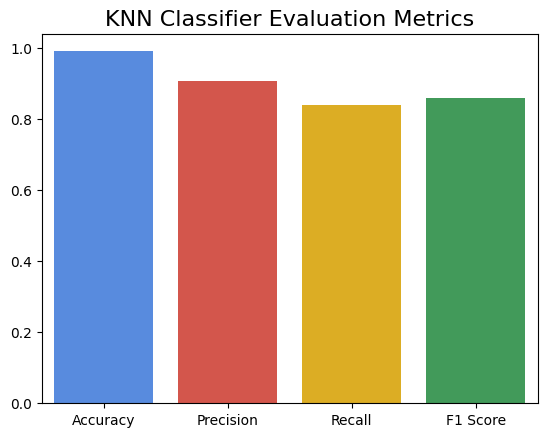

In [183]:
# Calculating evaluation metrics
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions, average='macro')
rec = recall_score(y_test, predictions, average='macro')
f1_s = f1_score(y_test, predictions, average='macro')

# Defining Google colors
colors = ["#4285F4", "#EA4335", "#FBBC05", "#34A853"]

# Creating a bar plot with the evaluation metrics
bar_plot = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[acc, prec, rec, f1_s], palette=colors)

# Setting the title for the bar plot
bar_plot.set_title("KNN Classifier Evaluation Metrics", fontsize=16)

# Printing the KNN classifier's evaluation metrics
print("KNN Classifier Evaluation Metrics:")
print('Accuracy:', acc)
print('Precision:', precision_score(y_test, predictions, average=None))
print('Recall:', recall_score(y_test, predictions, average=None))
print('F1 score:', f1_score(y_test, predictions, average=None))

In [184]:
#Decision Tree

# Preprocessing and feature selection steps (as mentioned in the previous code)

# Separating the features and target variable for training
X_train = selected_features_data.drop(['attack_category'], axis=1)
Y_train = selected_features_data['attack_category']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.30, random_state=42)

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Train the classifier using the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
predictions = decision_tree.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print("Decision Tree Accuracy:", accuracy)


Decision Tree Accuracy: 0.9947271218650464


Iteration 1, loss = 1.41271030
Iteration 2, loss = 1.40119416
Iteration 3, loss = 1.39010426
Iteration 4, loss = 1.37954313
Iteration 5, loss = 1.36939994
Iteration 6, loss = 1.35955515
Iteration 7, loss = 1.34984191
Iteration 8, loss = 1.34036433
Iteration 9, loss = 1.33122641
Iteration 10, loss = 1.32231138
Iteration 11, loss = 1.31365746
Iteration 12, loss = 1.30518605
Iteration 13, loss = 1.29688340
Iteration 14, loss = 1.28856872
Iteration 15, loss = 1.28035467
Iteration 16, loss = 1.27218198
Iteration 17, loss = 1.26392645
Iteration 18, loss = 1.25560502
Iteration 19, loss = 1.24706667
Iteration 20, loss = 1.23853958
Iteration 21, loss = 1.23001549
Iteration 22, loss = 1.22135392
Iteration 23, loss = 1.21256732
Iteration 24, loss = 1.20358857
Iteration 25, loss = 1.19447049
Iteration 26, loss = 1.18529506
Iteration 27, loss = 1.17590068
Iteration 28, loss = 1.16623238
Iteration 29, loss = 1.15651872
Iteration 30, loss = 1.14659911
Iteration 31, loss = 1.13638643
Iteration 32, los

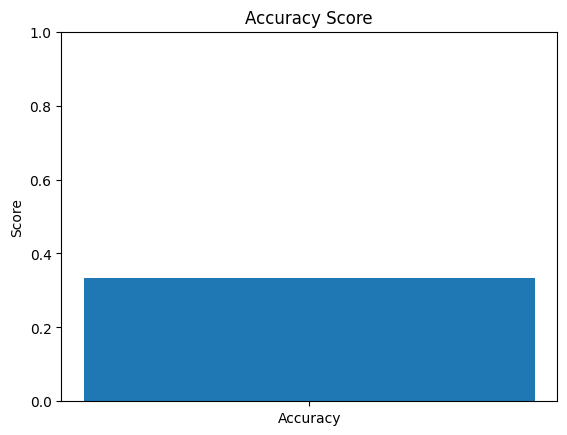

In [185]:
#ANN

# Load the data
attackdf = pd.read_csv(attack , delimiter=" ")

# Convert categorical variables to numerical values using one-hot encoding
ohe = OneHotEncoder(handle_unknown='ignore')
X = ohe.fit_transform(attackdf.iloc[:, :-1])
y = attackdf.iloc[:, -1]

# Replace missing values with the most frequent value
imp = SimpleImputer(strategy='most_frequent')
X = imp.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, alpha=0.0001, solver='adam', 
                    verbose=10, random_state=42, tol=0.0001)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Print the accuracy score
accuracy_score = clf.score(X_test, y_test)
print("Accuracy:", accuracy_score)

# Plot the accuracy score on a bar chart
fig, ax = plt.subplots()
ax.bar(["Accuracy"], [accuracy_score])
ax.set_ylim(0, 1)
ax.set_ylabel("Score")
ax.set_title("Accuracy Score")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


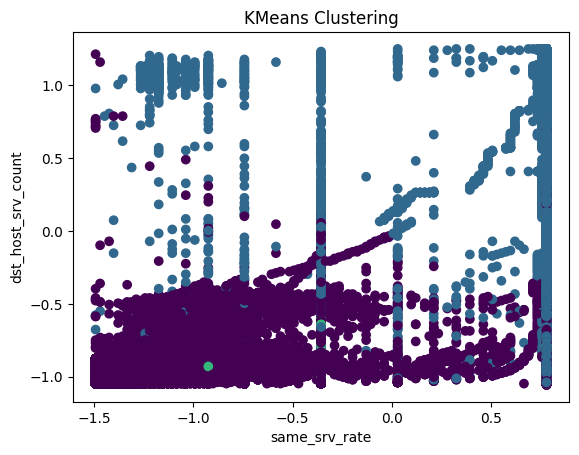

In [196]:
#KMEAN CLUSTERING
# Preprocess data
X = df[selected_feature_list]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implementing KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Plotting results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel(selected_feature_list[0])
plt.ylabel(selected_feature_list[1])
plt.title('KMeans Clustering')
plt.show()
